In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV, LassoCV, ElasticNetCV, RidgeCV

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
from mnist import MNIST
mndata = MNIST('./python-mnist/data')
training=mndata.load_training()
testing=mndata.load_testing()

In [3]:
type(training[0])

list

In [4]:
type(training)

tuple

In [5]:
type(testing)

tuple

In [6]:
len(training)

2

In [7]:
len(testing)

2

In [8]:
image = np.array(training[0][5]).reshape((28,28))

In [9]:
image.shape

(28, 28)

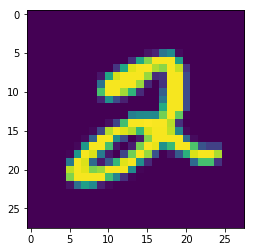

In [10]:
plt.imshow(image)
plt.show()

In [14]:
X_train=np.array(training[0])

In [15]:
type(X_train)

numpy.ndarray

In [18]:
y_train=np.array(training[1])# NOT SURE WHETHER THIS NEEDS TO BE LIST OR CAN STAY AN ARRAY

In [19]:
type(y_train)

numpy.ndarray

In [20]:
X_train.shape

(60000, 784)

In [21]:
len(y_train)

60000

In [23]:
X_test=np.array(testing[0])
y_test=np.array(testing[1])

In [24]:
X_test.shape

(10000, 784)

In [25]:
len(y_test)

10000

In [26]:
type(y_test)

numpy.ndarray

preprocessing

In [34]:
SS=StandardScaler()

In [35]:
X_train_ss= SS.fit_transform(X_train)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [36]:
X_train_ss.min()

-1.2742078920822268

In [55]:
X_train_ss.max()

244.94693302873063

In [56]:
X_train_ss.mean()

-2.1974863349995617e-18

In [59]:
X_train_ss.std()

MemoryError: 

In [39]:
X_train.min()

0

In [40]:
X_train.max()

255

values 0 to 1

In [41]:
X_train_01=X_train/255

In [42]:
X_train_01.min()

0.0

In [43]:
X_train_01.max()

1.0

deskew

In [44]:
from scipy.ndimage import interpolation

def moments(image):
    c0,c1 = np.mgrid[:image.shape[0],:image.shape[1]] # A trick in numPy to create a mesh grid
    totalImage = np.sum(image) #sum of pixels
    m0 = np.sum(c0*image)/totalImage #mu_x
    m1 = np.sum(c1*image)/totalImage #mu_y
    m00 = np.sum((c0-m0)**2*image)/totalImage #var(x)
    m11 = np.sum((c1-m1)**2*image)/totalImage #var(y)
    m01 = np.sum((c0-m0)*(c1-m1)*image)/totalImage #covariance(x,y)
    mu_vector = np.array([m0,m1]) # Notice that these are \mu_x, \mu_y respectively
    covariance_matrix = np.array([[m00,m01],[m01,m11]]) # Do you see a similarity between the covariance matrix
    return mu_vector, covariance_matrix

In [45]:
def deskew(image):
    c,v = moments(image)
    alpha = v[0,1]/v[0,0]
    affine = np.array([[1,0],[alpha,1]])
    ocenter = np.array(image.shape)/2.0
    offset = c-np.dot(affine,ocenter)
    return interpolation.affine_transform(image,affine,offset=offset)

In [46]:
def deskewAll(X):
    currents = []
    for i in range(len(X)):
        currents.append(deskew(X[i].reshape(28,28)).flatten())
    return np.array(currents)

X_train_deskewed = deskewAll(X_train)
X_test_deskewed = deskewAll(X_test)

In [51]:
image = X_train[5].reshape((28,28))

In [52]:
image_deskewed = X_train_deskewed[5].reshape((28,28))

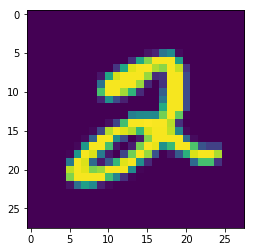

In [53]:
plt.imshow(image)
plt.show()

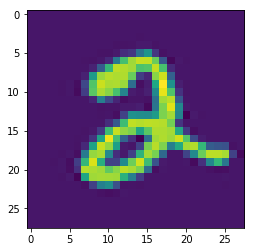

In [54]:
plt.imshow(image_deskewed)
plt.show()